In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
transformers=transforms.Compose([
                        transforms.ToTensor()])

In [3]:
def dataloader(train_bsize, test_bsize):
    train_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=True,download=True,
                            transform=transformers),batch_size=train_bsize, shuffle=True)
    test_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=False,download=True,
                            transform= transformers),batch_size=test_bsize, shuffle=True)
    return (train_dataloader,test_dataloader)


In [4]:
class DNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 20)
        self.l2 = nn.Linear(20, 20)
        self.l3 = nn.Linear(20, 10)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

In [5]:
def train_model(model,optimizer,train_dataloader,max_epochs):
    loss_list=[]
    accuracy_list=[]
    final_df=pd.DataFrame()
    for epoch in range(max_epochs):
        total_loss=0
        total_samples=0
        correct_samples=0
        model.train()
        counter=0
        for b_index,(data,t) in enumerate(train_dataloader):
            counter+=1
            #forward propagation
            optimizer.zero_grad()
            output=model(data.view(-1, 784))
            loss=Floss(output,t)
            loss.backward()
            optimizer.step()
            total_loss=total_loss+loss.data
            #For accuracy
            batch_samples=t.size(0)
            total_samples+=batch_samples
            predicted=np.argmax(output.data,axis=1)
            correct_samples += (predicted == t).sum().item()
        accuracy=(correct_samples/total_samples)*100
        loss_list.append(total_loss/counter)
        accuracy_list.append((round(accuracy),3))
        print("Epoch: ",epoch+1,"Accuracy: ",round(accuracy,2))
        pytorch_total_params = sum(p.numel() for p in model.parameters())
        print("pytorch_total_params",pytorch_total_params)
        #For parameters dataframe
        df = pd.DataFrame()
        for name,parameter in model.named_parameters():
            print(name,parameter.size())
            if 'weight' in name:
                ws=torch.nn.utils.parameters_to_vector(parameter).detach().numpy()
                df = pd.concat([df, pd.DataFrame(ws).T], axis = 1)
        final_df=pd.concat([final_df, df], axis = 0)  
    return loss_list,accuracy_list,final_df        
            

In [6]:
train_dataloader, test_dataloader= dataloader(1000,1000)
learning_rate=0.01
Floss=nn.CrossEntropyLoss()
max_epochs=45
weights_df=pd.DataFrame()
accuracy_list=[]
loss_list=[]
for i in range(8):
    print('new train counter: ',i)
    model1=DNN1()
    optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)
    temp_loss_list,temp_acc_list,w_df=train_model(model1,optimizer,train_dataloader,max_epochs)
    weights_df=weights_df.append(w_df)
    accuracy_list.extend(temp_acc_list)
    loss_list.extend(temp_loss_list)


new train counter:  0
Epoch:  1 Accuracy:  79.05
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  91.73
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.03
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  93.68
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  94.24
pytorch_total_params 16330
l1.weight torch.Size([20, 784])


Epoch:  38 Accuracy:  97.79
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  97.57
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  97.64
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  97.64
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  97.55
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/z3/x1qx9ndd01jc5v34qp1xkd3h0000gn/T/ipykernel_19081/1464282090.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  80.38
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  91.94
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.38
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.07
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  94.78
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  97.92
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.18
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.08
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.02
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.05
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/z3/x1qx9ndd01jc5v34qp1xkd3h0000gn/T/ipykernel_19081/1464282090.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  77.67
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.24
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.61
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.53
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  95.07
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  98.16
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.15
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.21
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.24
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.28
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/z3/x1qx9ndd01jc5v34qp1xkd3h0000gn/T/ipykernel_19081/1464282090.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  78.89
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.31
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.66
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.41
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  95.1
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20]

Epoch:  38 Accuracy:  98.44
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.46
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.56
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.63
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.48
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/z3/x1qx9ndd01jc5v34qp1xkd3h0000gn/T/ipykernel_19081/1464282090.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  76.2
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.94
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  94.48
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  95.25
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  95.84
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20]

Epoch:  38 Accuracy:  98.33
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.37
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.45
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.45
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.44
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/z3/x1qx9ndd01jc5v34qp1xkd3h0000gn/T/ipykernel_19081/1464282090.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  76.05
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.05
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.62
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.51
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  95.05
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  98.36
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.15
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.25
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.31
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.16
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/z3/x1qx9ndd01jc5v34qp1xkd3h0000gn/T/ipykernel_19081/1464282090.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  78.05
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  91.86
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.45
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.29
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  94.75
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  97.69
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  97.61
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  97.6
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  97.69
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  97.87
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size

/var/folders/z3/x1qx9ndd01jc5v34qp1xkd3h0000gn/T/ipykernel_19081/1464282090.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  79.7
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.16
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.63
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.47
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  94.98
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20]

Epoch:  38 Accuracy:  98.4
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.39
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.14
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.31
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.37
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size

/var/folders/z3/x1qx9ndd01jc5v34qp1xkd3h0000gn/T/ipykernel_19081/1464282090.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


In [13]:
print(weights_df.shape)

(360, 16280)


In [17]:
print(weights_df)

         0         1         2         3         4         5         6    \
0   0.011348 -0.009944 -0.002806  0.035645 -0.020699  0.018143 -0.022728   
0   0.011348 -0.009944 -0.002806  0.035645 -0.020699  0.018143 -0.022728   
0   0.011348 -0.009944 -0.002806  0.035645 -0.020699  0.018143 -0.022728   
0   0.011348 -0.009944 -0.002806  0.035645 -0.020699  0.018143 -0.022728   
0   0.011348 -0.009944 -0.002806  0.035645 -0.020699  0.018143 -0.022728   
..       ...       ...       ...       ...       ...       ...       ...   
0  -0.016379  0.012421  0.018207 -0.030679 -0.000277 -0.005202  0.014670   
0  -0.016379  0.012421  0.018207 -0.030679 -0.000277 -0.005202  0.014670   
0  -0.016379  0.012421  0.018207 -0.030679 -0.000277 -0.005202  0.014670   
0  -0.016379  0.012421  0.018207 -0.030679 -0.000277 -0.005202  0.014670   
0  -0.016379  0.012421  0.018207 -0.030679 -0.000277 -0.005202  0.014670   

         7         8         9    ...       190       191       192       193  \
0   0.

In [39]:
import pandas as pd
pca = PCA(n_components=2)
pca_ = pca.fit_transform(weights_df)
pca_df=pd.DataFrame(pca_,columns=['x','y'])
pca_df["accuracy"]=accuracy_list
pca_df["loss"]=loss_list
print(pca_df)

            x          y accuracy            loss
0   -2.083292  -0.884579  (79, 3)  tensor(0.7221)
1   -3.399833  -0.232183  (92, 3)  tensor(0.2900)
2   -4.520519   0.378158  (93, 3)  tensor(0.2414)
3   -5.547606   0.850252  (94, 3)  tensor(0.2182)
4   -6.555556   1.266740  (94, 3)  tensor(0.1940)
..        ...        ...      ...             ...
355 -1.890800 -23.006090  (98, 3)  tensor(0.0513)
356 -1.857182 -23.184431  (98, 3)  tensor(0.0494)
357 -1.944841 -23.352869  (98, 3)  tensor(0.0455)
358 -1.932258 -23.511656  (99, 3)  tensor(0.0454)
359 -1.981550 -23.603098  (99, 3)  tensor(0.0464)

[360 rows x 4 columns]


In [40]:
final_pca = pca_df.iloc[::3, :]
print(final_pca)

             x          y accuracy            loss
0    -2.083292  -0.884579  (79, 3)  tensor(0.7221)
3    -5.547606   0.850252  (94, 3)  tensor(0.2182)
6    -8.380819   2.050210  (95, 3)  tensor(0.1581)
9   -10.718739   2.979625  (96, 3)  tensor(0.1370)
12  -12.781152   3.877486  (96, 3)  tensor(0.1227)
..         ...        ...      ...             ...
345  -1.646366 -20.372030  (98, 3)  tensor(0.0575)
348  -1.688283 -21.203037  (98, 3)  tensor(0.0588)
351  -1.817558 -21.983633  (98, 3)  tensor(0.0532)
354  -1.912678 -22.819822  (98, 3)  tensor(0.0549)
357  -1.944841 -23.352869  (98, 3)  tensor(0.0455)

[120 rows x 4 columns]


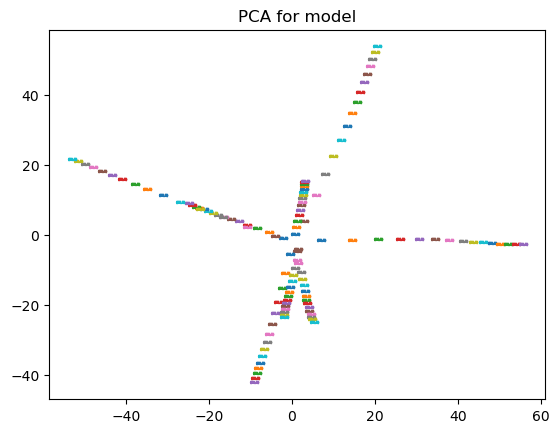

In [41]:
for i in range(final_pca.shape[0]):
    m = list(final_pca['accuracy'])[i]
    plt.scatter(final_pca['x'][i*3], final_pca['y'][i*3], marker = f'${m}$')
    plt.title("PCA for model")

In [42]:
model1=DNN1()
for name,parameter in model1.named_parameters():
    pd=[]
    params=parameter.numel()
    pd.append(name)
    pd.append(params)
    print(pd)

['l1.weight', 15680]
['l1.bias', 20]
['l2.weight', 400]
['l2.bias', 20]
['l3.weight', 200]
['l3.bias', 10]


In [50]:
layer1 = weights_df.iloc[ : , 0:15680]
df=np.array(layer1)
pca = PCA(n_components=2)
pca_ = pca.fit_transform(df)
print(pca_)
pca_df=pd.DataFrame(pca_,columns=['x','y'])
pca_df["accuracy"]=accuracy_list
pca_df["loss"]=loss_list
print(pca_df)

[[-2.02175689e+00 -1.02141345e+00]
 [-3.33723283e+00 -3.84327501e-01]
 [-4.45848703e+00  2.13363156e-01]
 [-5.48726320e+00  6.71083748e-01]
 [-6.49224377e+00  1.07968998e+00]
 [-7.40875101e+00  1.46900022e+00]
 [-8.32191658e+00  1.84493947e+00]
 [-9.17263889e+00  2.16375470e+00]
 [-9.99845791e+00  2.46403384e+00]
 [-1.06690426e+01  2.75744295e+00]
 [-1.13473053e+01  3.08406425e+00]
 [-1.20710812e+01  3.37216568e+00]
 [-1.27264805e+01  3.63019657e+00]
 [-1.33134937e+01  3.87006330e+00]
 [-1.39578981e+01  4.08586597e+00]
 [-1.46156063e+01  4.41028690e+00]
 [-1.51387835e+01  4.57456684e+00]
 [-1.57391357e+01  4.76423740e+00]
 [-1.62354488e+01  4.96573687e+00]
 [-1.67461853e+01  5.15587425e+00]
 [-1.71636734e+01  5.34069824e+00]
 [-1.76606255e+01  5.52453279e+00]
 [-1.81050625e+01  5.68451834e+00]
 [-1.85641994e+01  5.83972454e+00]
 [-1.90119076e+01  6.03130198e+00]
 [-1.94372025e+01  6.16726208e+00]
 [-1.98075008e+01  6.32631350e+00]
 [-2.01744823e+01  6.53054428e+00]
 [-2.04662838e+01  6

AttributeError: 'list' object has no attribute 'DataFrame'

In [51]:
final_pca = pca_df.iloc[::3, :]
print(final_pca)

             x          y accuracy            loss
0    -2.083292  -0.884579  (79, 3)  tensor(0.7221)
3    -5.547606   0.850252  (94, 3)  tensor(0.2182)
6    -8.380819   2.050210  (95, 3)  tensor(0.1581)
9   -10.718739   2.979625  (96, 3)  tensor(0.1370)
12  -12.781152   3.877486  (96, 3)  tensor(0.1227)
..         ...        ...      ...             ...
345  -1.646366 -20.372030  (98, 3)  tensor(0.0575)
348  -1.688283 -21.203037  (98, 3)  tensor(0.0588)
351  -1.817558 -21.983633  (98, 3)  tensor(0.0532)
354  -1.912678 -22.819822  (98, 3)  tensor(0.0549)
357  -1.944841 -23.352869  (98, 3)  tensor(0.0455)

[120 rows x 4 columns]


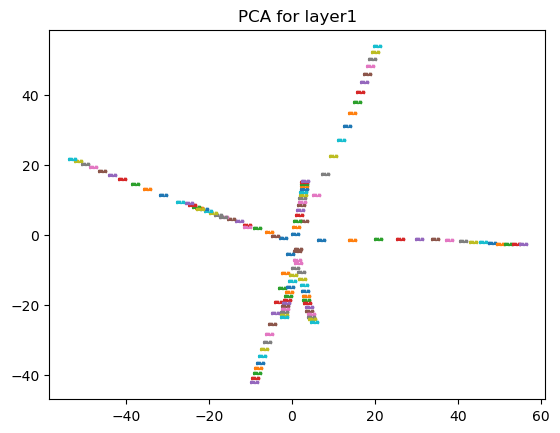

In [52]:
for i in range(final_pca.shape[0]):
    m = list(final_pca['accuracy'])[i]
    plt.scatter(final_pca['x'][i*3], final_pca['y'][i*3], marker = f'${m}$')
    plt.title("PCA for layer1")